# Large Language Models


## Pre-trained language models (PLM)

事前学習を行い、タスクごとにファインチューニングするという方法をとった言語モデル

- ELMo
- biLSTM
- BERT

など


## Large language models (LLM)

PLMのスケール（モデルのパラメータやデータ）を高めると、性能が向上することが経験的にわかっている（scaling law）。

パラメータ数を増加させたPLM（例えば1750億パラメータのGPT-3）は、比較的小さいPLM（15億パラメータのGPT-2など）に比べると異なる挙動と高いパフォーマンスを見せる。例えばGPT-3はin-context learning（解かせたいタスクの例を見せて自然言語で追加学習させる）において数個の少ない事例（few-shot）のみでうまく解くことができるが、GPT-2はそうではない。


:::{card} LLMの変遷

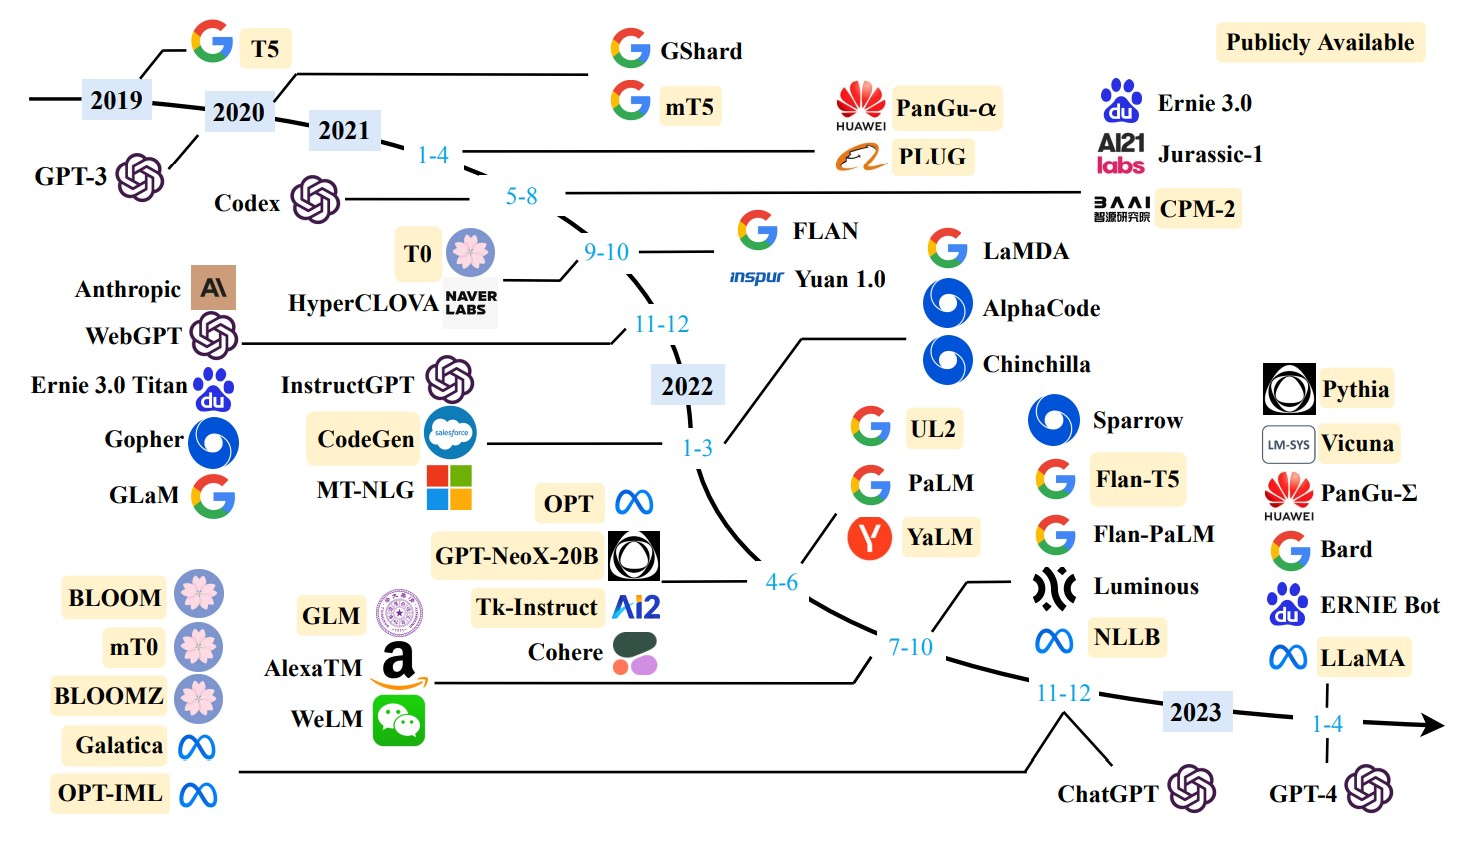

（[Zhao et al. (2023)](https://arxiv.org/pdf/2303.18223.pdf)より引用）
:::

- [Zhao, W. X., Zhou, K., Li, J., Tang, T., Wang, X., Hou, Y., ... & Wen, J. R. (2023). A Survey of Large Language Models. arXiv preprint arXiv:2303.18223.](https://arxiv.org/pdf/2303.18223.pdf)

## LLMの特徴

- Scaling Law（スケーリング則）：データやモデルの規模を大きくするにつれて性能が上がるという経験則
- Emergent Abilities（創発的能力）：一定以上の規模の言語モデルは性能が飛躍的に上昇したり、Fine-tuningなしにプロンプトだけでタスクの指示を与えられるようになる


[[2304.00612] Eight Things to Know about Large Language Models](https://arxiv.org/abs/2304.00612)

1. LLMs predictably get more capable with increasing investment, even without targeted innovation.
2. Many important LLM behaviors emerge unpredictably as a byproduct of increasing investment.
3. LLMs often appear to learn and use representations of the outside world.
4. There are no reliable techniques for steering the behavior of LLMs.
5. Experts are not yet able to interpret the inner workings of LLMs.
6. Human performance on a task isn't an upper bound on LLM performance.
7. LLMs need not express the values of their creators nor the values encoded in web text.
8. Brief interactions with LLMs are often misleading.

## Scaling Law（スケーリング則）

[Kaplan et al. (2020). Scaling laws for neural language models.](https://arxiv.org/abs/2001.08361)

- 自己回帰モデルのTransformerのtes lossはパラメータ数$N$、データセットのサイズ$D$、あるいは訓練に利用した（最適に配分された）計算量$C_{min}$の3つに強く依存する
- 予測性能が$N, D, C_{min}$のいずれかにのみ制限される場合、power-law（べき乗則）で予測できる
- $N^{0.74}/D$でパフォーマンスが制約される、つまりパラメータ数とデータ数を8:5の比率で増やすことで制約されずにパフォーマンスを伸ばせるとした

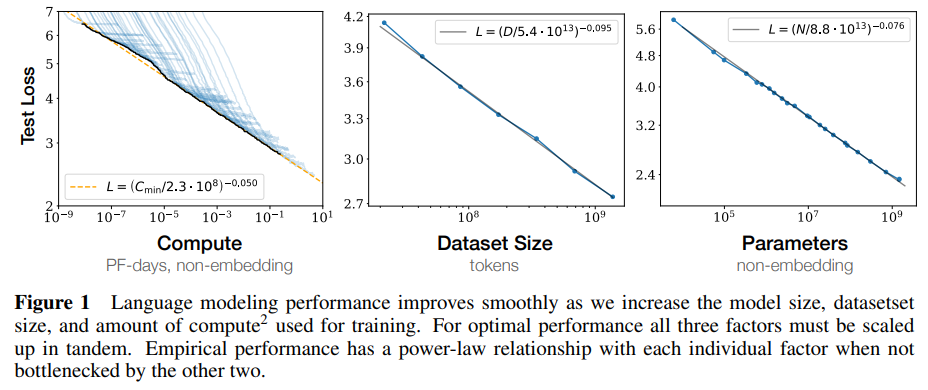

#### 過学習が起こらないわけではない

岡野原（2023）『大規模言語モデルは新たな知能か』では過学習が起こらないかのように書いていたが、さすがにそんなことはなさそう

> **Universality of overfitting:** Performance improves predictably as long as we scale up N and D in tandem, but enters a regime of diminishing returns if either N or D is held fixed while the other increases. The performance penalty depends predictably on the ratio N0.74/D, meaning that every time we increase the model size 8x, we only need to increase the data by roughly 5x to avoid a penalty. (Section 4)

NとDの両方を引き上げている場合に限り、予測可能なパフォーマンスの改善がみられた。しかしNかDの一方を固定して他方を引き上げると収益逓減（ diminishing returns）に突入する。
モデルサイズを8倍にするとき、データは約5倍引き上げる必要がある。


#### 他の分野でもScaling Lawが成り立つ

自己回帰的な生成モデルを用いる画像生成などでも成り立つとのこと

[[2010.14701] Scaling Laws for Autoregressive Generative Modeling](https://arxiv.org/abs/2010.14701)

参考：[OpenAIが発見したScaling Lawの秘密 - ディープラーニングブログ](https://deeplearning.hatenablog.com/entry/scaling_law)

## Chinchilla Scaling Law

[Hoffmann et al. (2022). Training compute-optimal large language models.](https://arxiv.org/abs/2203.15556)

Chinchilla Scaling Law (Chinchilla則, Hoffman Scaling Law) は、Scaling lawと同様に、パラメータ数$N$、訓練データ量$D$、計算量$C$から学習後の損失の値を予測できるというもの。

Scaling lawはパラメータ数とデータ量を$8:5$とやや訓練データを不足気味とするのが最適と主張した

一方、Chinchilla Scaling Lawはパラメータ数$N$と訓練データ量$D$は$1:1$の比率で増やすのが良いとした

この仮説に基づき訓練したモデル名がChinchilla



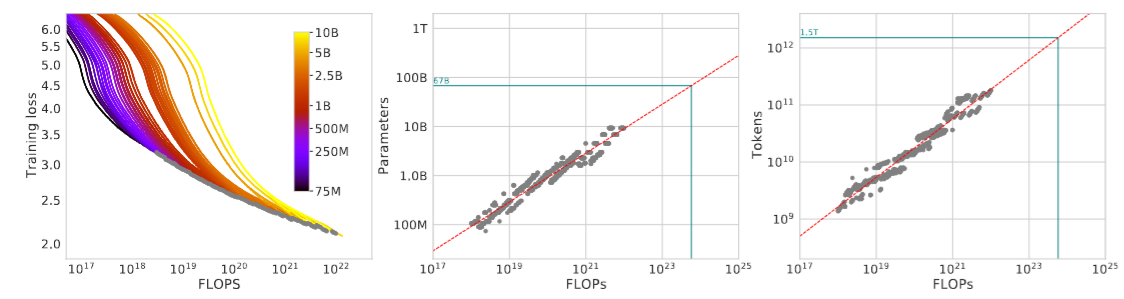

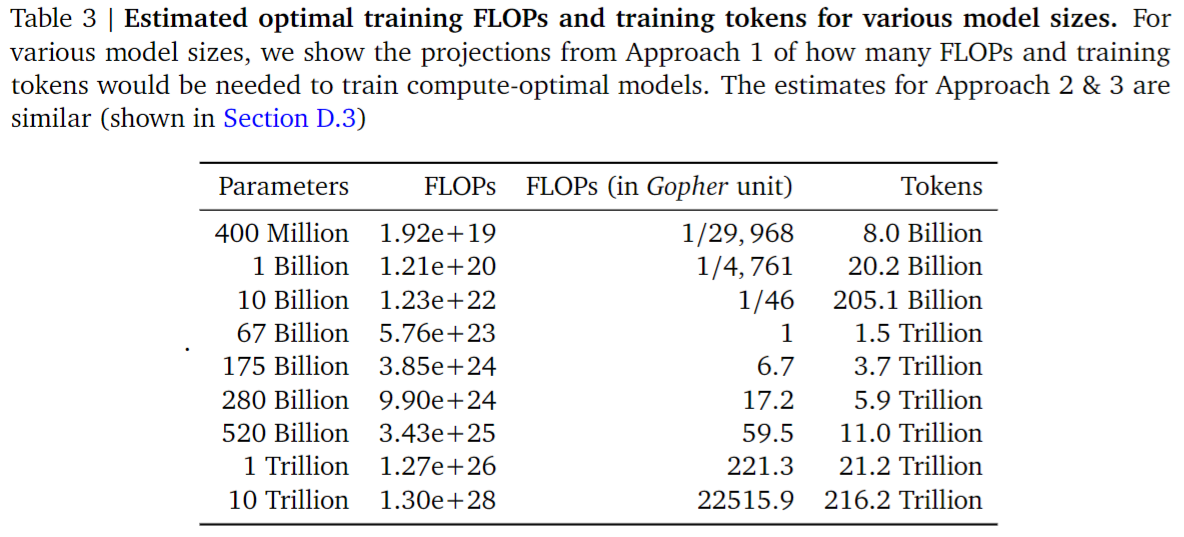

## データが多めでもよい可能性

Chinchilla則では「パラメータ数とトークン数が1:1が最適」と提案されたが、その後の研究では小さめモデルを多めの訓練データで訓練する手法もよく使われる

- Llamma2 (7/13/34/70B) は2Tトークン
- Llamma3 (8/70B) は15Tトークン
- TinyLlama (1.1B) は3Tトークン
- Phi-3 (の7/14Bモデル) は4.8T トークン


## 同じ事例は1回見せれば良い

- 事前学習では、膨大なデータを1エポックで事前学習するのが効率的（[Komatsuzaki, A. (2019). One epoch is all you need.](https://arxiv.org/abs/1906.06669)）
- 4エポックまでは1エポックまでのときと性能が大差ない（[Muennighoff et al. (2024). Scaling data-constrained language models.](https://arxiv.org/abs/2305.16264)）
- 訓練データ（コーパス）も重複したデータは削除するほうがよいとされる


## トークン長についての研究

### LongNet

Microsoftが発表、10億トークンまで扱える

[[2307.02486] LongNet: Scaling Transformers to 1,000,000,000 Tokens](https://arxiv.org/abs/2307.02486)

## 基盤モデル

従来はタスクに合わせてモデルを学習するアプローチが基本だった

基盤モデル（foundation model）は巨大な1つのモデルを異なるタスクに使いまわし、プロンプトなどでタスクに合わせる

[JSAI2023 Tutorial 「基盤モデルの技術と展望」 - Speaker Deck](https://speakerdeck.com/yusuke0519/jsai2023-tutorial-ji-pan-moderunoji-shu-tozhan-wang)

## Tabular Data

[[2402.17944] Large Language Models(LLMs) on Tabular Data: Prediction, Generation, and Understanding -- A Survey](https://arxiv.org/abs/2402.17944)

Tabular DataのTask：

1. Prediction（テーブルデータでの回帰・分類）
2. Data Generation（data augmentation）
3. Table understanding（テーブルの内容についての質問応答など）


## Instruction Tuning

Instruction Tuning（指示チューニング）：多くのタスク上でファインチューニング


### Self-instruct: instruction tuningデータの自動生成

- GPT-3を使って指示を生成
- Self-instructされたGPT-3はInstructGPTに迫る性能と評価された
    - 似たものがAlpaca 7B: Llama 7Bを self-instructionみたいな感じでファインチューニングした
- model imitation (**モデル模倣**）: self-instructionやAlpaca 7Bのように、教師モデルの出力から学習データを構築してLLMをファインチューニングすること
    - モデル模倣はモデルが本質的に賢くなるわけではない。表面上は教師モデルを真似ているだけでハルシネーションが増加する（[[2305.15717] The False Promise of Imitating Proprietary LLMs](https://arxiv.org/abs/2305.15717)）


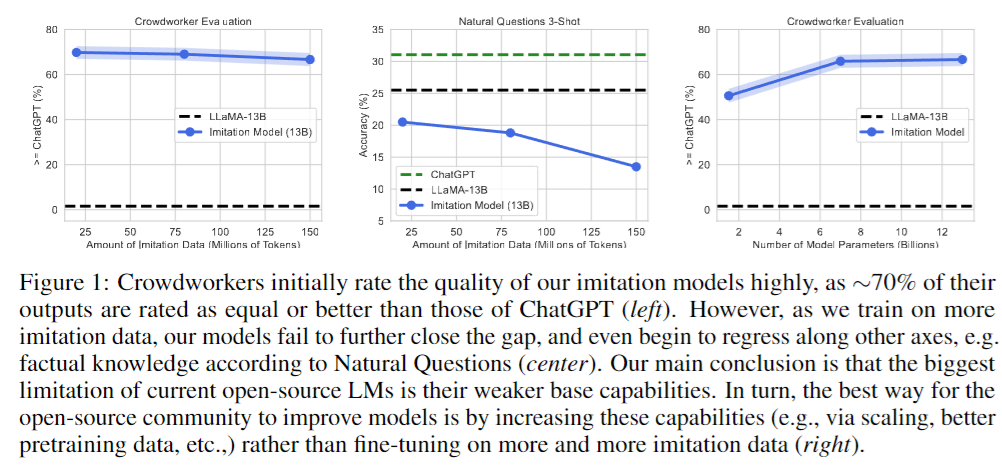

## PaLM

GoogleのLLM

[【論文紹介】Google. 2023. PaLM 2 Technical Report - Speaker Deck](https://speakerdeck.com/chokkan/google-2023-palm2-technical-report)

## 参考

- [ChatGPTなどの大規模言語モデルはどんな理論で成立したのか？重要論文24個まとめ - GIGAZINE](https://gigazine.net/news/20230604-large-language-model-paper/)
- 2024.03 [LLMの現在 - Speaker Deck](https://speakerdeck.com/pfn/llmnoxian-zai)
- JSAI2024 [大規模言語モデルの開発 - Speaker Deck](https://speakerdeck.com/chokkan/jsai2024-tutorial-llm)
- [ChatGPT - LLMシステム開発大全 - Speaker Deck](https://speakerdeck.com/hirosatogamo/chatgpt-azure-openai-da-quan)